# Chapter 3: Linear Models for Regression

- Linear Basis Function Models
    - A first glance at gradient descent
- Bias-Variance Decomposition
- Bayesian Model Comparison
- <strike> The Evidence Approximation </strike>
- <strike> Limitations of Fixed Basis Functions </strike>

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 3.1: Linear Basis Function Models



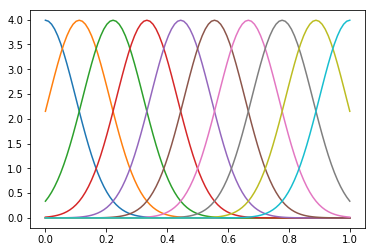

In [23]:
import scipy.stats

def gaussian_basis(loc, scale):
    return scipy.stats.norm(loc, scale).pdf

def plotf(f, xmin, xmax, steps=100):
    x = linspace(xmin, xmax, steps)
    y = [f(x_i) for x_i in x]
    plot(x, y)

basis_functions = [gaussian_basis(loc, .1) for loc in linspace(0, 1, 10)]
    
for i in range(10):
    plotf(basis_functions[i], 0, 1)

In [17]:
class TrainingData(object):
    def __init__(self, beta=0.3**-1):
        self.beta = beta
        self.data = linspace(0, 1, 10)
        self.targets = array([self.sample(x_i) for x_i in self.data])
        self.N = len(self.data)

    def sample(self, x):
        return sin(2*pi*x) + normal(scale=self.beta**-1)

training = TrainingData()

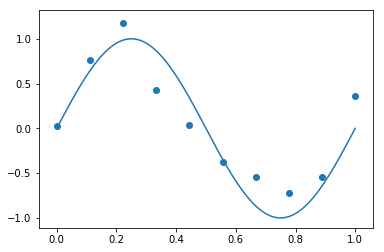

In [18]:
plotf(lambda x:sin(2*pi*x), 0, 1, 100)
scatter(training.data, training.targets);

[[ 3.99  2.15  0.34  0.02  0.    0.    0.    0.    0.    0.  ]
 [ 2.15  3.99  2.15  0.34  0.02  0.    0.    0.    0.    0.  ]
 [ 0.34  2.15  3.99  2.15  0.34  0.02  0.    0.    0.    0.  ]
 [ 0.02  0.34  2.15  3.99  2.15  0.34  0.02  0.    0.    0.  ]
 [ 0.    0.02  0.34  2.15  3.99  2.15  0.34  0.02  0.    0.  ]
 [ 0.    0.    0.02  0.34  2.15  3.99  2.15  0.34  0.02  0.  ]
 [ 0.    0.    0.    0.02  0.34  2.15  3.99  2.15  0.34  0.02]
 [ 0.    0.    0.    0.    0.02  0.34  2.15  3.99  2.15  0.34]
 [ 0.    0.    0.    0.    0.    0.02  0.34  2.15  3.99  2.15]
 [ 0.    0.    0.    0.    0.    0.    0.02  0.34  2.15  3.99]]


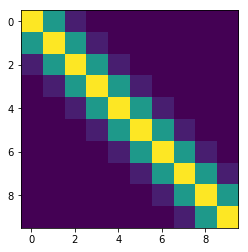

In [30]:
M = len(basis_functions)
N = training.N
Phi = zeros((N, M))
for i in range(N):
    for j in range(M):
        Phi[i,j] = basis_functions[i](training.data[j])
print Phi.round(2)
imshow(Phi);

In [35]:
w = solve(Phi.T.dot(Phi), Phi.T.dot(training.targets))
w.round(2)

array([-0.04,  0.04,  0.34, -0.14,  0.14, -0.14, -0.02, -0.06, -0.21,  0.21])

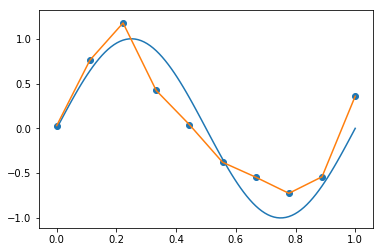

In [38]:
plotf(lambda x:sin(2*pi*x), 0, 1, 100)
scatter(training.data, training.targets);

class 

plot(linspace(0,1,10), Phi.dot(w))